# Testing on Fashion MNIST Dataset

In [1]:
import sys
sys.path.append("..")

In [2]:
## Enable/Disable Titles
show_titles = False

## Train a MLP on Fashion MNIST

In [3]:
import perceptrons.fashion as fashion

fashion_mlp = fashion.Fashion(
    [784, 64, 32, 10],  # Architecture
    10,                 # Num. of Epochs
    128,                # Batch Size
    "Fashion-MNIST-mlp" # MLP name
)

Epoch 1/10
375/375 [==============================] - 8s 19ms/step - loss: 1.9763 - accuracy: 0.4513 - val_loss: 1.3882 - val_accuracy: 0.6501
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 1.3569 - accuracy: 0.6684 - val_loss: 0.9980 - val_accuracy: 0.7860
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 1.0147 - accuracy: 0.7740 - val_loss: 0.9854 - val_accuracy: 0.7914
Epoch 4/10
375/375 [==============================] - 7s 17ms/step - loss: 0.9956 - accuracy: 0.7769 - val_loss: 1.0026 - val_accuracy: 0.7802
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.9797 - accuracy: 0.7816 - val_loss: 0.9447 - val_accuracy: 0.7925
Epoch 6/10
375/375 [==============================] - 6s 17ms/step - loss: 0.9823 - accuracy: 0.7800 - val_loss: 0.9639 - val_accuracy: 0.7872
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.9813 - accuracy: 0.7807 - val_loss: 0.9483 - val_accuracy: 0.7961


In [17]:
fashion_mlp.report()

~~ Reporting ~~
Parameters:
_________________________________________________________________
    Name:              Fashion-MNIST-mlp
    In. Shape.:        (28, 28)
    Out Dim.:          10
    Architercture:     ListWrapper([784, 64, 32, 10])
    Init.:             Training
    Activ. Func.:      ReLU
Layers:
_________________________________________________________________
    Name        In. Shape        Out. Shape          Weight Shape                  
    flatten     (28, 28)         (784,)              []                            
    dense_0     (784,)           (64,)               (784, 64)                     
    dense_1     (64,)            (32,)               (64, 32)                      
    dense_2     (32,)            (10,)               (32, 10)                      
Metrics:
_________________________________________________________________
    Train Loss:        1.0063
    Train Accuracy:    0.7652
    Test Loss:         1.0304
    Test Accuracy:     0.7546





## Pre-Processing

In [4]:
import numpy as np
import geometry.interval as interval
import geometry.circle as circle
import matplotlib.pyplot as plt

InputDomain = interval.Interval(
    np.zeros(fashion_mlp.in_shape),
    np.ones(fashion_mlp.in_shape)
)

### Generate Inputs for each Class

In [5]:
## Get random points
N                   = 1000
RandomTestInputs    = fashion_mlp.random_points(N)

Inputs_per_class = []
for c in range(10):
    input_c = None
    ind     = 0
    while (input_c is None) and (ind <= N-1):
        input = RandomTestInputs[ind]
        if fashion_mlp.predict(input) == c:
            input_c = input
        ind += 1

    if input_c is not None:
        Inputs_per_class.append(input_c)
        input_c = None
    else:
        print("Error: Did not find input for class", c)

#### Visualization

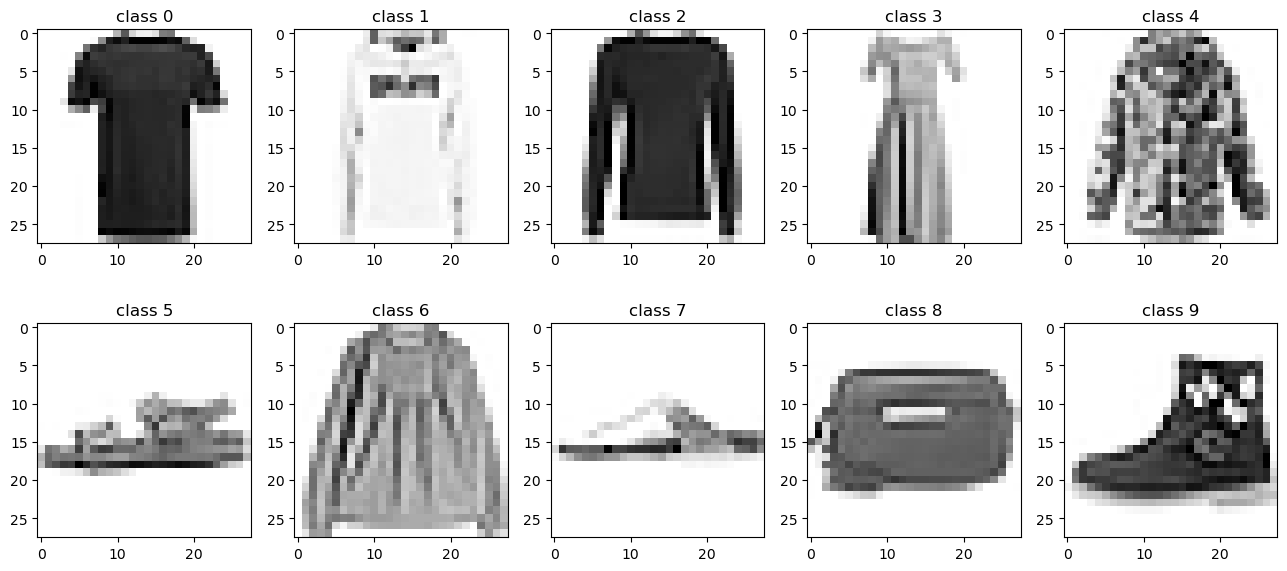

In [6]:
_, axarr = plt.subplots(2,5, figsize=(16, 7))

axarr[0, 0].imshow(Inputs_per_class[0], cmap="Greys", vmin=0.0, vmax=1.0)
axarr[0, 0].set_title("class 0")
axarr[0, 1].imshow(Inputs_per_class[1], cmap="Greys", vmin=0.0, vmax=1.0)
axarr[0, 1].set_title("class 1")
axarr[0, 2].imshow(Inputs_per_class[2], cmap="Greys", vmin=0.0, vmax=1.0)
axarr[0, 2].set_title("class 2")
axarr[0, 3].imshow(Inputs_per_class[3], cmap="Greys", vmin=0.0, vmax=1.0)
axarr[0, 3].set_title("class 3")
axarr[0, 4].imshow(Inputs_per_class[4], cmap="Greys", vmin=0.0, vmax=1.0)
axarr[0, 4].set_title("class 4")

axarr[1, 0].imshow(Inputs_per_class[5], cmap="Greys", vmin=0.0, vmax=1.0)
axarr[1, 0].set_title("class 5")
axarr[1, 1].imshow(Inputs_per_class[6], cmap="Greys", vmin=0.0, vmax=1.0)
axarr[1, 1].set_title("class 6")
axarr[1, 2].imshow(Inputs_per_class[7], cmap="Greys", vmin=0.0, vmax=1.0)
axarr[1, 2].set_title("class 7")
axarr[1, 3].imshow(Inputs_per_class[8], cmap="Greys", vmin=0.0, vmax=1.0)
axarr[1, 3].set_title("class 8")
axarr[1, 4].imshow(Inputs_per_class[9], cmap="Greys", vmin=0.0, vmax=1.0)
axarr[1, 4].set_title("class 9")

plt.show()

## Metrics

In [8]:
## tight divergence
def avg_tight_divergence(relu_scores, conv_scores):
    tight_divergence        = np.max(np.abs(relu_scores - conv_scores), 0)
    avg_tight_divergence    = np.sum(tight_divergence) / len(tight_divergence)

    return avg_tight_divergence

## misclassification
def misclassification_prob(relu_preds, conv_preds):
    misclassifications      = np.array(relu_preds) != np.array(conv_preds)
    misclassification_prob  = np.sum(misclassifications) / len(misclassifications)

    return misclassification_prob

## Increasing Radius per Class

###  Average Tight Divergence

#### Experiment

In [9]:
import perceptrons.convex as convex

In [ ]:
import geometry.norms as norms

N = 10_000

avg_tight_divergence_per_class  = []    # a 2D array containing the average,
                                        # per class, per radius
worst_ub_per_class              = []    # a 2D array containing the worst case,
                                        # UB, per class, per radius

for c in range(10):

    avg_tight_divergence_per_radius = []
    worst_ub_per_radius             = []
    for rad in np.arange(0, 1.1, 0.1):
        ## Create Vicinity
        center      = Inputs_per_class[c]
        vicinity    = circle.InfCircle(center, rad).get_interval() & InputDomain

        ## Generate Inputs
        RandomInputs = vicinity.random_points(N)

        ## Generate Tight Conv. Approx. for Vicinity
        conv_approx = convex.ConvexApprox(
                        fashion_mlp,
                        vicinity
                    )
        
        ## Calculate Scores
        relu_scores = fashion_mlp.scores(RandomInputs)
        conv_scores = conv_approx.scores(RandomInputs)

        ## Calculate Metrics
        atd = avg_tight_divergence(relu_scores, conv_scores)
        avg_tight_divergence_per_radius.append(atd)

        ## Calculate worst case UB
        UB = conv_approx.propagate_bounds(vicinity)[0][-1].ub
        UB = np.max(np.abs(UB))
        worst_ub_per_radius.append(UB)

    
    avg_tight_divergence_per_class.append(avg_tight_divergence_per_radius)
    worst_ub_per_class.append(worst_ub_per_radius)

[[0.0, 1.6519205093383789, 3.8360569000244142, 5.792442321777344, 7.584764862060547, 9.272414398193359, 10.79660415649414, 12.322306823730468, 13.788601684570313, 14.978956604003907, 15.65914306640625], [0.0, 2.3027675628662108, 4.307905960083008, 6.116843414306641, 7.761910247802734, 9.334528350830078, 10.855706787109375, 12.317992401123046, 13.700698852539062, 14.935235595703125, 15.65914306640625], [0.0, 1.9652080535888672, 4.430722045898437, 6.711299133300781, 8.495974731445312, 10.031855010986328, 11.443430328369141, 12.797067260742187, 14.066673278808594, 15.108059692382813, 15.65914306640625], [0.0, 2.702992630004883, 4.933107376098633, 6.880946350097656, 8.699441528320312, 10.32386474609375, 11.756723022460937, 12.883480834960938, 13.863470458984375, 14.788406372070312, 15.65914306640625], [0.0, 2.8232582092285154, 5.8183746337890625, 8.18038330078125, 10.063565826416015, 11.619171142578125, 12.898466491699219, 13.914608764648438, 14.703555297851562, 15.243923950195313, 15.6591

#### Visualization

In [11]:
import matplotlib.colors as mcolors
colors_per_class = list(mcolors.TABLEAU_COLORS.keys())

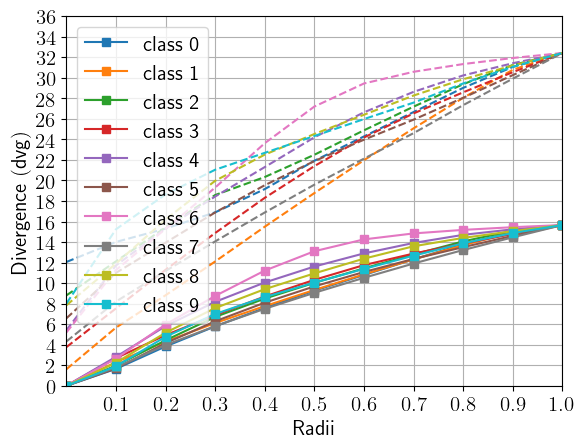

In [19]:
## Latex
plt.rcParams['text.usetex'] = True

## show UB
show_ub = True

## log plots
plt.rcParams.update({'font.size': 15})
ax = plt.axes()



radii = np.arange(0, 1.1, 0.1)
for c in range(10):
    plt.plot(
        radii,
        avg_tight_divergence_per_class[c],
        label="class " + str(c),
        linestyle = "-",
        color = colors_per_class[c],
        marker="s"
    )
    if show_ub:
        plt.plot(
            radii,
            worst_ub_per_class[c],
            #label="class " + str(c),
            linestyle = "--",
            color = colors_per_class[c],
            #marker="s"
        )   

plt.legend()
plt.grid(True)
if show_titles: plt.title("Average Tight Divergence\n w.r.t. Increasing Radii")
plt.ylabel("Divergence $(\mathsf{dvg})$")
plt.xlabel("Radii")

plt.xticks(np.arange(0.1, 1.1, 0.1))
if show_ub:
    plt.yticks(np.arange(0, 38, 2))
    ax.set(xlim=(0, 1), ylim=(0, 36))
else:
    plt.yticks(np.arange(0, 17))
    ax.set(xlim=(0, 1), ylim=(0, 16))

plt.show()

### Counting Misclassifications

#### Experiment

In [13]:
N = 10_000

missclassification_prob_per_class = []

for c in range(10):

    missclassification_prob_per_radius = []
    for rad in np.arange(0, 1.1, 0.1):
        ## Create Vicinity
        center      = Inputs_per_class[c]
        vicinity    = circle.InfCircle(center, rad).get_interval() & InputDomain

        ## Generate Inputs
        RandomInputs = vicinity.random_points(N)

        ## Generate Tight Conv. Approx. for Vicinity
        conv_approx = convex.ConvexApprox(
                        fashion_mlp,
                        vicinity
                    )
        
        ## Calculate Scores
        relu_preds = fashion_mlp.predict(RandomInputs)
        conv_preds = conv_approx.predict(RandomInputs)

        ## Calculate Metrics
        mcp = misclassification_prob(relu_preds, conv_preds)
        missclassification_prob_per_radius.append(mcp)
    
    missclassification_prob_per_class.append(missclassification_prob_per_radius)


#print(missclassification_prob_per_class)

#### Visualization

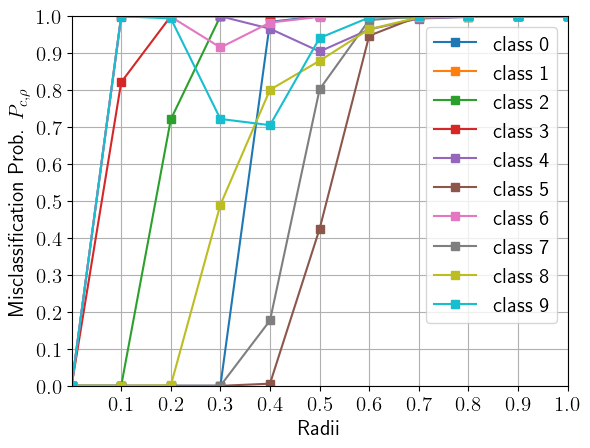

In [14]:
## Latex
plt.rcParams['text.usetex'] = True

## log plots
plt.rcParams.update({'font.size': 15})
ax = plt.axes()



radii = np.arange(0, 1.1, 0.1)
for c in range(10):
    plt.plot(
        radii,
        missclassification_prob_per_class[c],
        label="class " + str(c),
        linestyle = "-",
        color = colors_per_class[c],
        marker="s"
    )

plt.legend()
plt.grid(True)
if show_titles: plt.title("Misclassification Probability\n w.r.t. Increasing Radii")
plt.ylabel("Misclassification Prob. $P_{c, \\rho}$")
plt.xlabel("Radii")

plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
ax.set(xlim=(0, 1), ylim=(0, 1))
plt.show()